Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Number of inputs: 2
Number of charge states: 6

Test Accuracy: 1.000000

Completed in 45.7156920433 seconds.


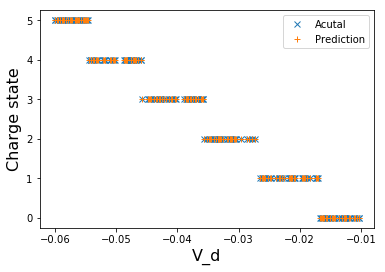

In [34]:
# using tf.contrib.learn deep neural network
%reset

import numpy as np
import tensorflow as tf
from datetime import datetime
tf.logging.set_verbosity(tf.logging.ERROR)

import matplotlib.pyplot as plt
import time
%matplotlib inline
st = time.time()

# data is assumed to be [input_params, output_param]
# number of input_param is variable and is determined by the code
# there is supposed to be only one output param, the charge state of the 
# single dot

# change the file name if using a different system
data = np.loadtxt('/Users/ssk4/quantum-ml/ndot/ml/data/single_dot.txt')

# data randomly permuted to improve learning rate
data = np.random.permutation(data)
n_tot = data.shape[0]
n_train = int(0.8*n_tot)
n_test = n_tot - n_train

# count the number of states, +1 because 0 is also a state
charge_max = int(np.max(data[:,-1]))
n_out = charge_max + 1
# there is only one output for a single dot, the charge state
# represnted as prob vector

# input parameters
n_inp = data.shape[1] - 1

print "Number of inputs:", n_inp
print "Number of charge states:", n_out

x_train_data = data[:n_train,:-1].reshape((n_train,n_inp))
#generate the prob vector
y_train_data = data[:n_train,-1].astype(int)

x_test_data = data[n_train:,:-1].reshape((n_test,n_inp))
y_test_data = data[n_train:,-1].astype(int)

#get data
def get_train_inputs():
    x = tf.constant(x_train_data)
    y = tf.constant(y_train_data)
    return x,y

def get_test_inputs():
    x = tf.constant(x_test_data)
    y = tf.constant(y_test_data)
    return x,y

# load datasets
features = [tf.contrib.layers.real_valued_column("",dimension=n_inp)]

classifier = tf.contrib.learn.DNNClassifier(feature_columns=features,\
                                            hidden_units=[6,6],n_classes=n_out,\
                                            model_dir="/tmp/dot_learning" \
                                            + str(datetime.now()))

# Magic happens here!

classifier.fit(input_fn=get_train_inputs, steps=20000)

accuracy_score = classifier.evaluate(input_fn=get_test_inputs,
                                       steps=1)["accuracy"]

print("\nTest Accuracy: {0:f}\n".format(accuracy_score))


predictions = list(classifier.predict(input_fn=get_test_inputs))

print "Completed in",time.time()-st, "seconds."

plt.plot(x_test_data[:,0],y_test_data,'x')
plt.plot(x_test_data[:,0],predictions,'+')
plt.legend(['Acutal','Prediction'])
plt.xlabel('V_d',fontsize=16)
plt.ylabel('Charge state',fontsize=16)